In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import math
data=pd.read_csv('PELVIC1.csv')
data.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info
data.shape

(310, 7)

In [5]:
data.isnull()
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
data['class']

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: class, Length: 310, dtype: object

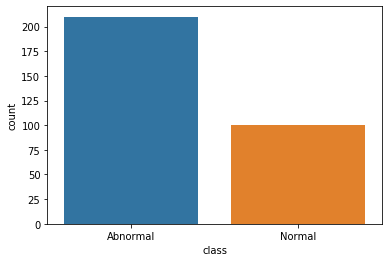

In [7]:
sns.countplot(x='class',data=data)

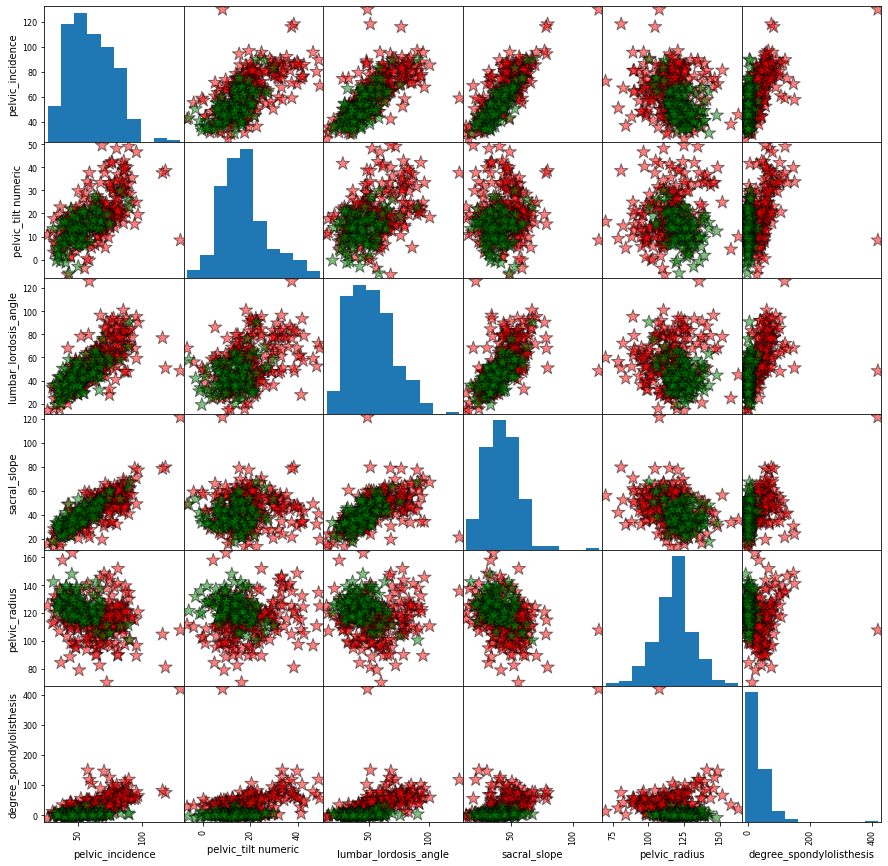

In [8]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020507748748>,
      dtype=object)

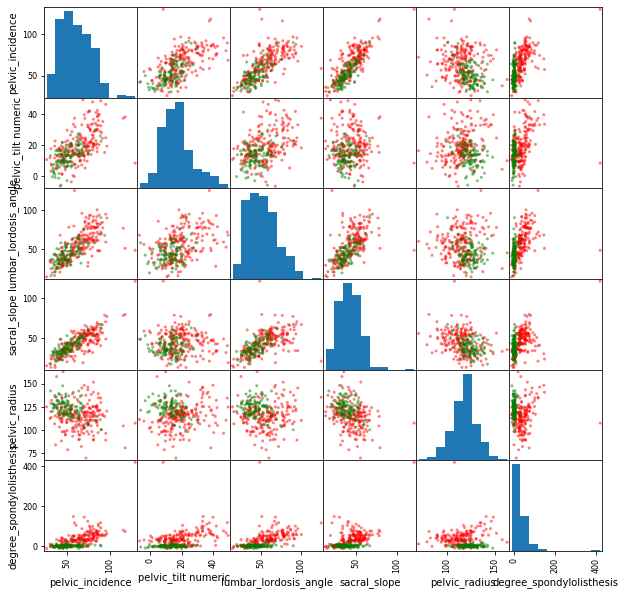

In [9]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[ : , : ],figsize=(10,10),c=color_list)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 18)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.8817204301075269


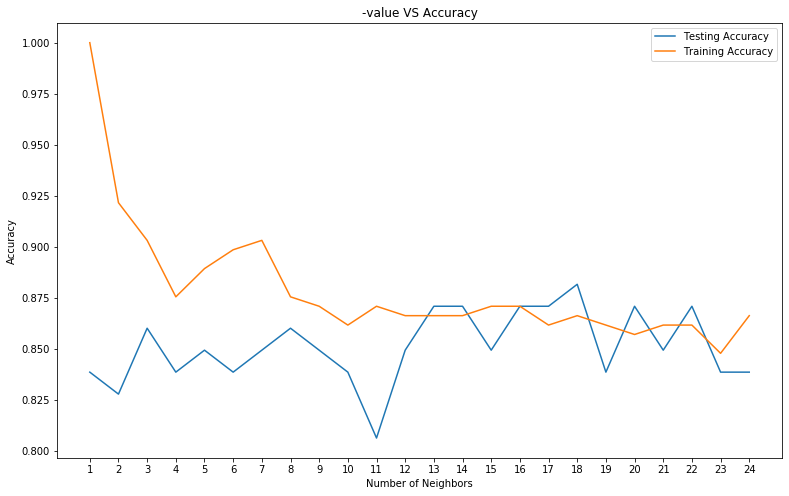

Best accuracy is 0.8817204301075269 with K = 18


In [13]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [14]:
x = np.array(data.loc[:,'pelvic_incidence']).reshape(-1,1)
y= np.array(data.loc[:,'sacral_slope']).reshape(-1,1)
x

array([[ 63.0278175 ],
       [ 39.05695098],
       [ 68.83202098],
       [ 69.29700807],
       [ 49.71285934],
       [ 40.25019968],
       [ 53.43292815],
       [ 45.36675362],
       [ 43.79019026],
       [ 36.68635286],
       [ 49.70660953],
       [ 31.23238734],
       [ 48.91555137],
       [ 53.5721702 ],
       [ 57.30022656],
       [ 44.31890674],
       [ 63.83498162],
       [ 31.27601184],
       [ 38.69791243],
       [ 41.72996308],
       [ 43.92283983],
       [ 54.91944259],
       [ 63.07361096],
       [ 45.54078988],
       [ 36.12568347],
       [ 54.12492019],
       [ 26.14792141],
       [ 43.58096394],
       [ 44.5510115 ],
       [ 66.87921138],
       [ 50.81926781],
       [ 46.39026008],
       [ 44.93667457],
       [ 38.66325708],
       [ 59.59554032],
       [ 31.48421834],
       [ 32.09098679],
       [ 35.70345781],
       [ 55.84328595],
       [ 52.41938511],
       [ 35.49244617],
       [ 46.44207842],
       [ 53.85479842],
       [ 66

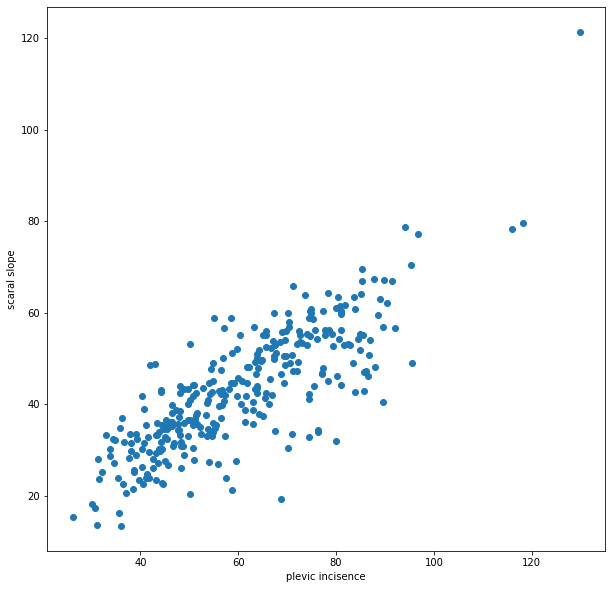

In [13]:
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('plevic incisence')
plt.ylabel('scaral slope')
plt.show()

SCORE 0.664159783972475


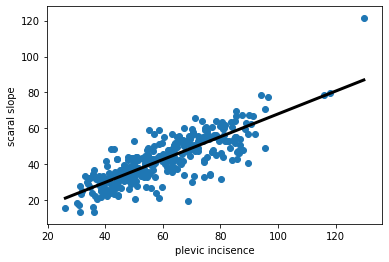

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predict_space = np.linspace(min(x),max(x)).reshape(-1,1)
reg.fit(x,y)
predicted =  reg.predict(predict_space)
print('SCORE',reg.score(x,y))
plt.plot(predict_space,predicted,color='black',linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('plevic incisence')
plt.ylabel('scaral slope')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
reg = LinearRegression()
k = 5
croess_val = cross_val_score(reg,x,y,cv=k)
print('cv score:',croess_val)
print('avaregae:',np.sum(croess_val)/k)

cv score: [0.02827495 0.50977686 0.36780416 0.59740705 0.55938911]
avaregae: 0.41253042676812085


In [17]:
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 2, test_size = 0.6)
ridge = Ridge( alpha=0.1,normalize=True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('ridge score:',ridge.score(x_test,y_test))



ridge score: 0.6172910628805306


In [18]:
from sklearn.linear_model import Lasso

In [19]:
x=np.array(data.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle' ,'pelvic_radius']])

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=3)
lassi = Lasso(alpha=0.1,normalize=True)
lassi.fit(x_train,y_train)
predict = lassi.predict(x_test)
print('lassi score :',lassi.score(x_test,y_test))
print(lassi.coef_)

lassi score : 0.9023074191684635
[ 0.71928734 -0.53173709  0.00419965 -0.        ]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
x = (data.loc[:,data.columns!='class'])
y=(data.loc[:,'class'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.3,random_state=3)

In [24]:
rand = RandomForestClassifier(random_state= 4)
rand.fit(x,y)
predict = rand.predict(x_test)
cm=confusion_matrix(y_test,predict)
print('confusion matrix: \n',cm)
print('classification report :\n',classification_report(y_test,predict))
print('scores:',rand.score(x_test,y_test))

confusion matrix: 
 [[66  0]
 [ 0 27]]
classification report :
               precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00        66
      Normal       1.00      1.00      1.00        27

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

scores: 1.0


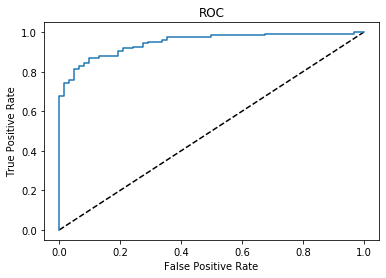

In [26]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.6,random_state = 3)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
prob = logreg.predict_proba(x_test)[:,1]
fpr , tpr , threshold = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()



In [27]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 4}
Best score: 0.7559434901667911


In [29]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

C:\Users\divit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\divit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\divit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\divit\anaconda3\lib\site-packages\

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.8572425164890919


In [30]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}
